In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install nibabel
!pip install numpy pandas matplotlib medpy opencv-python

In [4]:
import numpy as np
import pandas as pd
import os
import nibabel as nb
from matplotlib import pyplot as plt
import random
import zipfile
import SimpleITK as sitk

In [5]:
#Dataset is in zip format. It's extracted in this cell using 'zipfile' library and saved in a working directory.
zip_path = "/content/drive/MyDrive/ACDC.zip"
extract_dir = "/working/ACDC"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Contents of the extracted directory:", os.listdir(extract_dir))

Contents of the extracted directory: ['ACDC']


In [6]:
print("Contents of the extracted directory:", os.listdir(extract_dir))

Contents of the extracted directory: ['ACDC']


In [7]:
for patient in os.listdir('/working/ACDC'):
    print(patient)
    patient_path = os.path.join('/working/ACDC', patient)
    print("Contents of ", patient_path, ":", os.listdir(patient_path))

ACDC
Contents of  /working/ACDC/ACDC : ['database']


In [8]:
patient_train_dir = "/working/ACDC/ACDC/database/training/"
#Printing training directory
for root, dirs, files in os.walk(patient_train_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print('-' * 40)

Root: /working/ACDC/ACDC/database/training/
Directories: ['patient092', 'patient074', 'patient046', 'patient029', 'patient030', 'patient097', 'patient042', 'patient007', 'patient016', 'patient063', 'patient041', 'patient017', 'patient014', 'patient073', 'patient033', 'patient077', 'patient094', 'patient086', 'patient032', 'patient078', 'patient076', 'patient061', 'patient005', 'patient022', 'patient003', 'patient090', 'patient004', 'patient058', 'patient062', 'patient034', 'patient001', 'patient043', 'patient099', 'patient048', 'patient050', 'patient006', 'patient091', 'patient036', 'patient008', 'patient067', 'patient096', 'patient071', 'patient011', 'patient070', 'patient051', 'patient084', 'patient100', 'patient079', 'patient023', 'patient012', 'patient068', 'patient080', 'patient095', 'patient057', 'patient009', 'patient037', 'patient038', 'patient002', 'patient088', 'patient049', 'patient039', 'patient059', 'patient085', 'patient025', 'patient021', 'patient027', 'patient089', 'pat

In [9]:
patient_test_dir = "/working/ACDC/ACDC/database/training/"
#Printing testing directory
for root, dirs, files in os.walk(patient_test_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print('-' * 40)

Root: /working/ACDC/ACDC/database/training/
Directories: ['patient092', 'patient074', 'patient046', 'patient029', 'patient030', 'patient097', 'patient042', 'patient007', 'patient016', 'patient063', 'patient041', 'patient017', 'patient014', 'patient073', 'patient033', 'patient077', 'patient094', 'patient086', 'patient032', 'patient078', 'patient076', 'patient061', 'patient005', 'patient022', 'patient003', 'patient090', 'patient004', 'patient058', 'patient062', 'patient034', 'patient001', 'patient043', 'patient099', 'patient048', 'patient050', 'patient006', 'patient091', 'patient036', 'patient008', 'patient067', 'patient096', 'patient071', 'patient011', 'patient070', 'patient051', 'patient084', 'patient100', 'patient079', 'patient023', 'patient012', 'patient068', 'patient080', 'patient095', 'patient057', 'patient009', 'patient037', 'patient038', 'patient002', 'patient088', 'patient049', 'patient039', 'patient059', 'patient085', 'patient025', 'patient021', 'patient027', 'patient089', 'pat

In [10]:
#Trying to load ED-ES images and their ground truth for two random patients
#Using 'nibabel' library, images are loaded.

# Loading the images for Patient 010 (Random selection).
patient010_dir = "/working/ACDC/ACDC/database/training/patient010"

ed_image_path = os.path.join(patient010_dir, 'patient010_frame01.nii.gz')
es_image_path = os.path.join(patient010_dir, 'patient010_frame13.nii.gz')
ed_gt_path = os.path.join(patient010_dir, 'patient010_frame01_gt.nii.gz')
es_gt_path = os.path.join(patient010_dir, 'patient010_frame13_gt.nii.gz')

# Loading the images for Patient 010 (Random selection)
ed_image = nb.load(ed_image_path).get_fdata() # 'nb.load() loads the images, by using the nibabel library imported as 'nb'.
es_image = nb.load(es_image_path).get_fdata()
ed_gt = nb.load(ed_gt_path).get_fdata()
es_gt = nb.load(es_gt_path).get_fdata()

# Shapes
print("ED Image Shape for Patient 010:", ed_image.shape)
print("ES Image Shape for Patient 010:", es_image.shape)
print("ED GT Shape for Patient 010:", ed_gt.shape)
print("ES GT Shape for Patient 010:", es_gt.shape)

print("\n")

# Loading the images for Patient 041
patient041_dir = "/working/ACDC/ACDC/database/training/patient041"

ed_image_path_041 = os.path.join(patient041_dir, 'patient041_frame01.nii.gz')
es_image_path_041 = os.path.join(patient041_dir, 'patient041_frame11.nii.gz')
ed_gt_path_041 = os.path.join(patient041_dir, 'patient041_frame01_gt.nii.gz')
es_gt_path_041 = os.path.join(patient041_dir, 'patient041_frame11_gt.nii.gz')

ed_image_041 = nb.load(ed_image_path_041).get_fdata()
es_image_041 = nb.load(es_image_path_041).get_fdata()
ed_gt_041 = nb.load(ed_gt_path_041).get_fdata()
es_gt_041 = nb.load(es_gt_path_041).get_fdata()

# Shapes
print("ED Image Shape for Patient 041:", ed_image_041.shape)
print("ES Image Shape for Patient 041:", es_image_041.shape)
print("ED GT Shape for Patient 041:", ed_gt_041.shape)
print("ES GT Shape for Patient 041:", es_gt_041.shape)

ED Image Shape for Patient 010: (208, 256, 10)
ES Image Shape for Patient 010: (208, 256, 10)
ED GT Shape for Patient 010: (208, 256, 10)
ES GT Shape for Patient 010: (208, 256, 10)


ED Image Shape for Patient 041: (154, 224, 6)
ES Image Shape for Patient 041: (154, 224, 6)
ED GT Shape for Patient 041: (154, 224, 6)
ES GT Shape for Patient 041: (154, 224, 6)


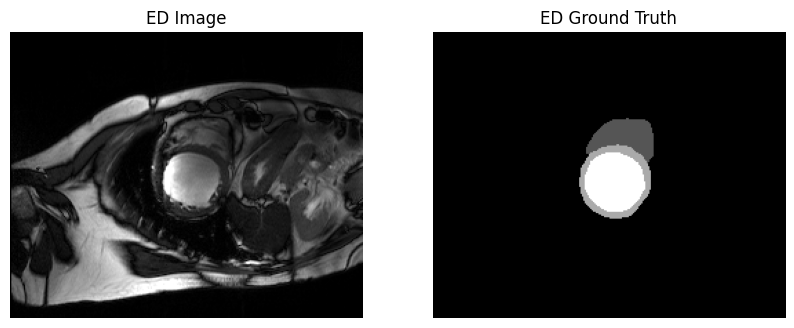

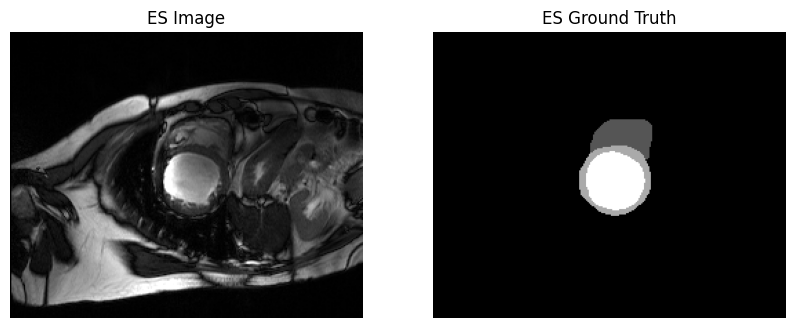

In [11]:
# Mid slices in ED and ES state of Patient 010 is plotted along with their labels/masks/ground truths.

def display_slices(images, titles=None):
    n = len(images)
    fig, axs = plt.subplots(1, n, figsize=(n * 5, 5))
    for i in range(n):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].axis('off')
        if titles:
            axs[i].set_title(titles[i])
    plt.show()
slice_idx = ed_image.shape[2] // 2
display_slices([ed_image[:, :, slice_idx], ed_gt[:, :, slice_idx]],
               titles=["ED Image", "ED Ground Truth"])
display_slices([es_image[:, :, slice_idx], es_gt[:, :, slice_idx]],
               titles=["ES Image", "ES Ground Truth"])

In [12]:
#EDA
# Calculating pixel value statistics for images (ED and ES state) of Patient 010.
print("ED Image Pixel Range:", np.min(ed_image), "-", np.max(ed_image))
print("ES Image Pixel Range:", np.min(es_image), "-", np.max(es_image))

# Calculating class distribution in the ground truth masks
ed_classes, ed_class_counts = np.unique(ed_gt, return_counts=True)
es_classes, es_class_counts = np.unique(es_gt, return_counts=True)

print("ED GT Class Distribution:", dict(zip(ed_classes, ed_class_counts)))
print("ES GT Class Distribution:", dict(zip(es_classes, es_class_counts)))

ED Image Pixel Range: 7.0 - 255.0
ES Image Pixel Range: 7.0 - 255.0
ED GT Class Distribution: {0.0: 502823, 1.0: 10723, 2.0: 6730, 3.0: 12204}
ES GT Class Distribution: {0.0: 506887, 1.0: 8130, 2.0: 6572, 3.0: 10891}


In [13]:
# Calculating pixel value statistics for images (ED and ES state) of Patient 041.
print("ED Image Pixel Range:", np.min(ed_image_041), "-", np.max(ed_image_041))
print("ES Image Pixel Range:", np.min(es_image_041), "-", np.max(es_image_041))

# Calculating class distribution in the ground truth masks
ed_classes_041, ed_class_counts_041 = np.unique(ed_gt_041, return_counts=True)
es_classes_041, es_class_counts_041 = np.unique(es_gt_041, return_counts=True)

print("ED GT Class Distribution:", dict(zip(ed_classes_041, ed_class_counts_041)))
print("ES GT Class Distribution:", dict(zip(es_classes_041, es_class_counts_041)))

ED Image Pixel Range: 3.0 - 255.0
ES Image Pixel Range: 4.0 - 255.0
ED GT Class Distribution: {0.0: 198327, 1.0: 2735, 2.0: 2665, 3.0: 3249}
ES GT Class Distribution: {0.0: 200317, 1.0: 1495, 2.0: 3087, 3.0: 2077}


In [14]:
# Created a loader function and info extraction function to load images and extract information from info.cfg file.

def load_nii(file_path):
    try:
        img = nb.load(file_path)
        data = img.get_fdata()
        if data.size == 0:
            raise ValueError("Empty file")
        return data
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")
        return None

def load_patient_data(patient_dir):
    images = []

    for root, dirs, files in os.walk(patient_dir):
        for file in files:
            if file.endswith('.nii') or file.endswith('.nii.gz'):
                file_path = os.path.join(root, file)
                img_data = load_nii(file_path)
                if img_data is not None:
                    images.append(img_data)
    return images

# Example usage:
train_dir = "/working/ACDC/ACDC/database/training"  # Path to the training data
patient_id = "patient003"  # Example patient ID
patient_dir = os.path.join(train_dir, patient_id)  # Path to the patient directory
patient_data = load_patient_data(patient_dir)

print(f"Loaded {len(patient_data)} images for {patient_id}.")


Loaded 5 images for patient003.


In [15]:
# Created a DataFrame to organize the dataset.

def extract_patient_info(patient_id, data_dir):

    info_file_path = os.path.join(data_dir, patient_id, 'Info.cfg')

    with open(info_file_path, 'r') as f:
        lines = f.read().splitlines()

    patient_info = {'Patient ID': patient_id}
    for line in lines:
        if line:
            key, value = line.split(':')
            patient_info[key.strip()] = value.strip()

    ed_frame = int(patient_info['ED'])
    es_frame = int(patient_info['ES'])

    for phase, frame in [('ED', ed_frame), ('ES', es_frame)]:
        image_path = os.path.join(data_dir, patient_id, f"{patient_id}_frame{frame:02d}.nii.gz")
        gt_path = os.path.join(data_dir, patient_id, f"{patient_id}_frame{frame:02d}_gt.nii.gz")
        image_folder = os.path.join(data_dir, patient_id, f"{patient_id}_frame{frame:02d}")
        gt_folder = os.path.join(data_dir, patient_id, f"{patient_id}_frame{frame:02d}_gt")

        # Checking if it's a file or directory and get the .nii.gz file path
        for path_type, path in [('Image', image_path), ('GT', gt_path)]:
            if os.path.isfile(path):
                patient_info[f'{phase} {path_type} Path'] = path
            elif os.path.isdir(path):
                files = [f for f in os.listdir(path) if f.endswith('.nii.gz')]
                if len(files) == 1:
                    patient_info[f'{phase} {path_type} Path'] = os.path.join(path, files[0])
                else:
                    print(f"Warning: Multiple or no .nii.gz files found in {phase} {path_type} folder for {patient_id}")
                    patient_info[f'{phase} {path_type} Path'] = None
            else:
                print(f"Error: {phase} {path_type} path is neither a file nor a directory for {patient_id}")
                patient_info[f'{phase} {path_type} Path'] = None

    # Constructing file path for the 4D image
    patient_info['4D Image Path'] = os.path.join(data_dir, patient_id, f"{patient_id}_4d.nii.gz")

    # Checking if 4D Image Path is a file or directory
    if os.path.isfile(patient_info['4D Image Path']):
        pass  # If it's a file, no further action is needed
    elif os.path.isdir(patient_info['4D Image Path']):
        files_4d = [f for f in os.listdir(patient_info['4D Image Path']) if f.endswith('.nii.gz')]
        if len(files_4d) == 1:
            patient_info['4D Image Path'] = os.path.join(patient_info['4D Image Path'], files_4d[0])
        else:
            print(f"Warning: Multiple or no .nii.gz files found in 4D Image folder for {patient_id}")
            patient_info['4D Image Path'] = None
    else:
        print(f"Error: 4D Image path is neither a file nor a directory for {patient_id}")
        patient_info['4D Image Path'] = None

    return patient_info

# Getting all patient directories (both train and test data)
train_dir = "/working/ACDC/ACDC/database/training"
test_dir = "/working/ACDC/ACDC/database/testing"
patient_dirs = [p for p in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, p))]
patient_dirs_test = [p for p in os.listdir(test_dir) if os.path.isdir(os.path.join(test_dir, p))]

# Extracting information and creation of DataFrame
all_patient_info = [extract_patient_info(patient_id, train_dir) for patient_id in patient_dirs]
df = pd.DataFrame(all_patient_info)

all_patient_info_test = [extract_patient_info(patient_id, test_dir) for patient_id in patient_dirs_test]
df_test = pd.DataFrame(all_patient_info)

# Displaying the first few rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))
print(df_test.head().to_markdown(index=False, numalign="left", stralign="left"))

# Printing the column names
print(df.columns)
print(df_test.columns)


| Patient ID   | ED   | ES   | Group   | Height   | NbFrame   | Weight   | ED Image Path                                                             | ED GT Path                                                                   | ES Image Path                                                             | ES GT Path                                                                   | 4D Image Path                                                        |
|:-------------|:-----|:-----|:--------|:---------|:----------|:---------|:--------------------------------------------------------------------------|:-----------------------------------------------------------------------------|:--------------------------------------------------------------------------|:-----------------------------------------------------------------------------|:---------------------------------------------------------------------|
| patient092   | 1    | 6    | RV      | 170      | 15        | 69       | /working/ACDC

In [16]:
# Displaying the data of Patient 087 from the DataFrame.

filtered_df = df[df['Patient ID'] == 'patient087']

if not filtered_df.empty:
    print(filtered_df.to_markdown(index=False, numalign="left", stralign="left"))
else:
    print("No record found for patient087")

filtered_df['ED Image Path'].values[0]


| Patient ID   | ED   | ES   | Group   | Height   | NbFrame   | Weight   | ED Image Path                                                             | ED GT Path                                                                   | ES Image Path                                                             | ES GT Path                                                                   | 4D Image Path                                                        |
|:-------------|:-----|:-----|:--------|:---------|:----------|:---------|:--------------------------------------------------------------------------|:-----------------------------------------------------------------------------|:--------------------------------------------------------------------------|:-----------------------------------------------------------------------------|:---------------------------------------------------------------------|
| patient087   | 1    | 10   | RV      | 170      | 28        | 64       | /working/ACDC

'/working/ACDC/ACDC/database/training/patient087/patient087_frame01.nii.gz'

In [17]:
!pip install matplotlib SimpleITK

In [18]:
print(filtered_df['ED Image Path'].values[0])

/working/ACDC/ACDC/database/training/patient087/patient087_frame01.nii.gz


In [19]:
#BSA column for training data
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Calculating BSA for train data
df['BSA'] = np.sqrt((df['Height'] * df['Weight']) / 3600)

In [20]:
#BSA column for testing data
df_test['Height'] = pd.to_numeric(df_test['Height'], errors='coerce')
df_test['Weight'] = pd.to_numeric(df_test['Weight'], errors='coerce')

# Calculating BSA for test data
df_test['BSA'] = np.sqrt((df_test['Height'] * df_test['Weight']) / 3600)

In [21]:
df.head()

,Patient ID,ED,ES,Group,Height,NbFrame,Weight,ED Image Path,ED GT Path,ES Image Path,ES GT Path,4D Image Path,BSA
0,patient092,1,6,RV,170.0,15,69.0,/working/ACDC/ACDC/database/training/patient09...,/working/ACDC/ACDC/database/training/patient09...,/working/ACDC/ACDC/database/training/patient09...,/working/ACDC/ACDC/database/training/patient09...,/working/ACDC/ACDC/database/training/patient09...,1.805085
1,patient074,1,12,NOR,175.0,30,87.0,/working/ACDC/ACDC/database/training/patient07...,/working/ACDC/ACDC/database/training/patient07...,/working/ACDC/ACDC/database/training/patient07...,/working/ACDC/ACDC/database/training/patient07...,/working/ACDC/ACDC/database/training/patient07...,2.056494
2,patient046,1,10,MINF,186.0,30,74.0,/working/ACDC/ACDC/database/training/patient04...,/working/ACDC/ACDC/database/training/patient04...,/working/ACDC/ACDC/database/training/patient04...,/working/ACDC/ACDC/database/training/patient04...,/working/ACDC/ACDC/database/training/patient04...,1.955335
3,patient029,1,12,HCM,163.0,30,55.0,/working/ACDC/ACDC/database/training/patient02...,/working/ACDC/ACDC/database/training/patient02...,/working/ACDC/ACDC/database/training/patient02...,/working/ACDC/ACDC/database/training/patient02...,/working/ACDC/ACDC/database/training/patient02...,1.578061
4,patient030,1,12,HCM,150.0,35,54.0,/working/ACDC/ACDC/database/training/patient03...,/working/ACDC/ACDC/database/training/patient03...,/working/ACDC/ACDC/database/training/patient03...,/working/ACDC/ACDC/database/training/patient03...,/working/ACDC/ACDC/database/training/patient03...,1.500000


In [22]:
df_test.head()

,Patient ID,ED,ES,Group,Height,NbFrame,Weight,ED Image Path,ED GT Path,ES Image Path,ES GT Path,4D Image Path,BSA
0,patient092,1,6,RV,170.0,15,69.0,/working/ACDC/ACDC/database/training/patient09...,/working/ACDC/ACDC/database/training/patient09...,/working/ACDC/ACDC/database/training/patient09...,/working/ACDC/ACDC/database/training/patient09...,/working/ACDC/ACDC/database/training/patient09...,1.805085
1,patient074,1,12,NOR,175.0,30,87.0,/working/ACDC/ACDC/database/training/patient07...,/working/ACDC/ACDC/database/training/patient07...,/working/ACDC/ACDC/database/training/patient07...,/working/ACDC/ACDC/database/training/patient07...,/working/ACDC/ACDC/database/training/patient07...,2.056494
2,patient046,1,10,MINF,186.0,30,74.0,/working/ACDC/ACDC/database/training/patient04...,/working/ACDC/ACDC/database/training/patient04...,/working/ACDC/ACDC/database/training/patient04...,/working/ACDC/ACDC/database/training/patient04...,/working/ACDC/ACDC/database/training/patient04...,1.955335
3,patient029,1,12,HCM,163.0,30,55.0,/working/ACDC/ACDC/database/training/patient02...,/working/ACDC/ACDC/database/training/patient02...,/working/ACDC/ACDC/database/training/patient02...,/working/ACDC/ACDC/database/training/patient02...,/working/ACDC/ACDC/database/training/patient02...,1.578061
4,patient030,1,12,HCM,150.0,35,54.0,/working/ACDC/ACDC/database/training/patient03...,/working/ACDC/ACDC/database/training/patient03...,/working/ACDC/ACDC/database/training/patient03...,/working/ACDC/ACDC/database/training/patient03...,/working/ACDC/ACDC/database/training/patient03...,1.500000


In [23]:
# Function to check and report inconsistent image shapes for the first 5 patients
def report_shapes_for_first_patients(df, column_name):
    for i in range(5):
        patient_id = df.iloc[i]['Patient ID']
        image_path = df.iloc[i][column_name]
        image_shape = nb.load(image_path).shape
        print(f"Patient ID: {patient_id} | Image Shape: {image_shape}")

# Checking the ED Image and GT Shapes for the first 5 patients
print("ED Image Shapes for First 5 Patients:")
report_shapes_for_first_patients(df, 'ED Image Path')

print("\nED GT Shapes for First 5 Patients:")
report_shapes_for_first_patients(df, 'ED GT Path')

# Checking the ES Image and GT Shapes for the first 5 patients
print("\nES Image Shapes for First 5 Patients:")
report_shapes_for_first_patients(df, 'ES Image Path')

print("\nES GT Shapes for First 5 Patients:")
report_shapes_for_first_patients(df, 'ES GT Path')

ED Image Shapes for First 5 Patients:
Patient ID: patient092 | Image Shape: (174, 208, 15)
Patient ID: patient074 | Image Shape: (256, 256, 8)
Patient ID: patient046 | Image Shape: (256, 216, 9)
Patient ID: patient029 | Image Shape: (192, 256, 11)
Patient ID: patient030 | Image Shape: (216, 256, 10)

ED GT Shapes for First 5 Patients:
Patient ID: patient092 | Image Shape: (174, 208, 15)
Patient ID: patient074 | Image Shape: (256, 256, 8)
Patient ID: patient046 | Image Shape: (256, 216, 9)
Patient ID: patient029 | Image Shape: (192, 256, 11)
Patient ID: patient030 | Image Shape: (216, 256, 10)

ES Image Shapes for First 5 Patients:
Patient ID: patient092 | Image Shape: (174, 208, 15)
Patient ID: patient074 | Image Shape: (256, 256, 8)
Patient ID: patient046 | Image Shape: (256, 216, 9)
Patient ID: patient029 | Image Shape: (192, 256, 11)
Patient ID: patient030 | Image Shape: (216, 256, 10)

ES GT Shapes for First 5 Patients:
Patient ID: patient092 | Image Shape: (174, 208, 15)
Patient I

In [24]:
ed_image_list = df['ED Image Path'].sample(10)
ed_gt_list = df['ED GT Path'].sample(10)
es_image_list = df['ES Image Path'].sample(10)
es_gt_list = df['ES GT Path'].sample(10)

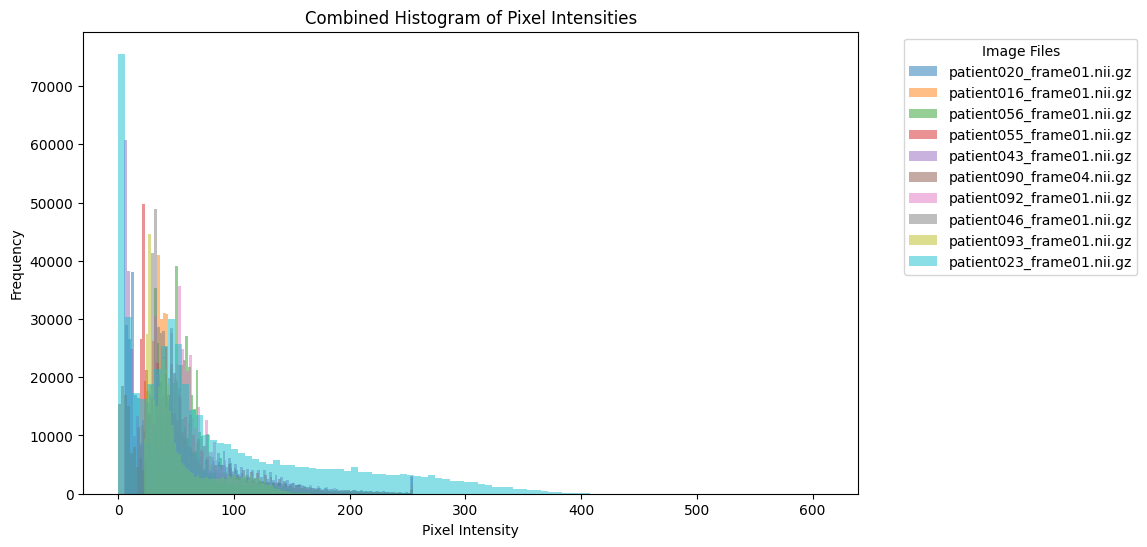

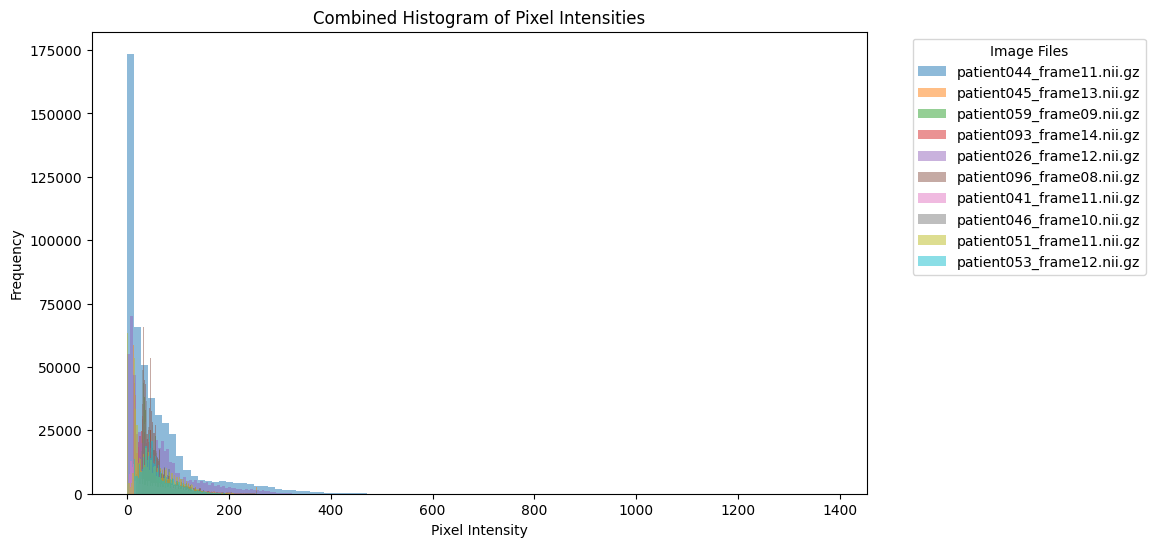

In [25]:
#Plotting of pixel intensities in ED and ES images for 10 patients
def plot_combined_histogram(image_paths):
    plt.figure(figsize=(10, 6))

    # If paths are just filenames, extracting the file name without the directory path:
    for idx, path in enumerate(image_paths):
        image = nb.load(path).get_fdata()
        pixels = image.ravel()  # Flattening the image data to 1D array
        # Getting just the filename from the path for labeling
        label = path.split('/')[-1]
        plt.hist(pixels, bins=100, alpha=0.5, label=label)
    plt.title('Combined Histogram of Pixel Intensities')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend(title='Image Files', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_combined_histogram(ed_image_list.tolist())
plot_combined_histogram(es_image_list.tolist())

<ipython-input-26-05635f52cad6>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, i].set_xticklabels(labels, rotation=45)  # Rotate for better label visibility
<ipython-input-26-05635f52cad6>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, i].set_xticklabels(labels, rotation=45)  # Rotate for better label visibility


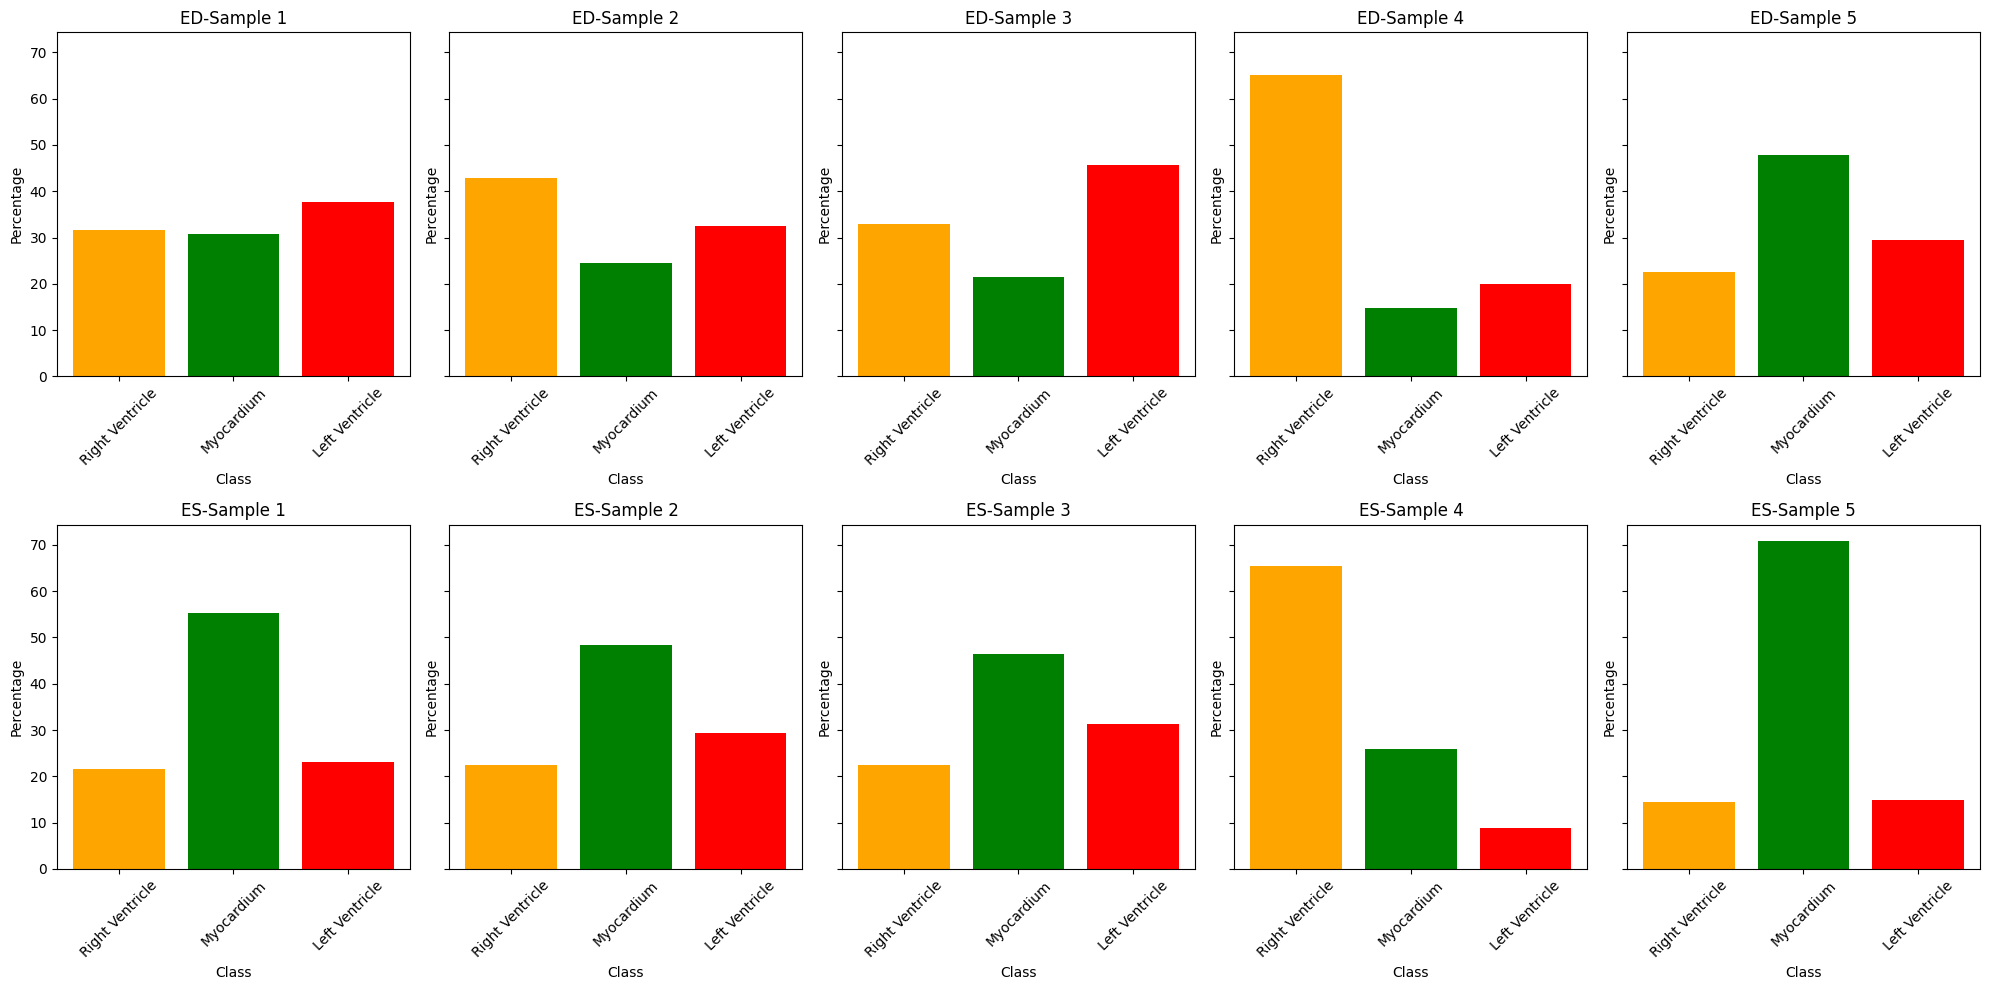

In [26]:
# Function to load and processing ground truth images
def load_and_process_gt(paths):
    class_percentages = []
    for path in paths:
        gt_image = nb.load(path).get_fdata()
        gt_image = gt_image.flatten()
        counts = np.bincount(gt_image.astype(int), minlength=4)
        non_background_counts = counts[1:]  # Exclude background
        percentages = non_background_counts / non_background_counts.sum() * 100
        class_percentages.append(percentages)
    return class_percentages

# Replacing these with actual lists of paths you have
ed_gt_paths = ed_gt_list.tolist()  # Assuming ed_gt_list is accessible as a list
es_gt_paths = es_gt_list.tolist()

# Loading and processing GT images for 5 samples
ed_class_percentages = load_and_process_gt(ed_gt_paths[:5])
es_class_percentages = load_and_process_gt(es_gt_paths[:5])

# Plotting class distributions for ED and ES ground truth images, excluding background
labels = ['Right Ventricle', 'Myocardium', 'Left Ventricle']
num_samples = 5

fig, axes = plt.subplots(2, num_samples, figsize=(20, 10), sharey=True)

# Plotting for ED
for i in range(num_samples):
    axes[0, i].bar(labels, ed_class_percentages[i], color=['orange', 'green', 'red'])
    axes[0, i].set_title(f'ED-Sample {i+1}')
    axes[0, i].set_xlabel('Class')
    axes[0, i].set_ylabel('Percentage')
    axes[0, i].set_xticklabels(labels, rotation=45)  # Rotate for better label visibility

# Plotting for ES
for i in range(num_samples):
    axes[1, i].bar(labels, es_class_percentages[i], color=['orange', 'green', 'red'])
    axes[1, i].set_title(f'ES-Sample {i+1}')
    axes[1, i].set_xlabel('Class')
    axes[1, i].set_ylabel('Percentage')
    axes[1, i].set_xticklabels(labels, rotation=45)  # Rotate for better label visibility

plt.tight_layout()
plt.show()

In [27]:
#Preprocessing
from skimage.transform import resize

def preprocess_image(image_data, target_shape=(256, 256), target_depth=10):
    #Normalization
    image = (image_data - np.min(image_data)) / (np.max(image_data) - np.min(image_data))
    #resizing
    resized_image = np.stack([resize(slice, target_shape, anti_aliasing=True) for slice in image.transpose(2, 0, 1)], axis=2)
    if resized_image.shape[-1] > target_depth:
        resized_image = resized_image[:, :, :target_depth]
    elif resized_image.shape[-1] < target_depth:
      #padding
        pad_width = ((0, 0), (0, 0), (0, target_depth - resized_image.shape[-1]))
        resized_image = np.pad(resized_image, pad_width, mode='constant', constant_values=0)
    return resized_image

def preprocess_mask(mask_data, target_shape=(256, 256), target_depth=10):
    #Resizing the ground truth mask to match the target shape and depth.
    resized_mask = np.stack([resize(slice, target_shape, order=0, preserve_range=True, anti_aliasing=False) for slice in mask_data.transpose(2, 0, 1)], axis=2)
    # Handling depth consistency
    if resized_mask.shape[-1] > target_depth:
        # Trimming the extra slices
        resized_mask = resized_mask[:, :, :target_depth]
    elif resized_mask.shape[-1] < target_depth:
        # Padding with zeros to match the target depth
        pad_width = ((0, 0), (0, 0), (0, target_depth - resized_mask.shape[-1]))
        resized_mask = np.pad(resized_mask, pad_width, mode='constant', constant_values=0)
    return resized_mask

def load_and_preprocess_image(file_path, is_mask=False):
    if not isinstance(file_path, str):
        file_path = str(file_path)
    image_data = nb.load(file_path).get_fdata()
    if is_mask:
        return preprocess_mask(image_data)
    else:
        return preprocess_image(image_data)

# Applying preprocessing to all images and masks listed in the DataFrame
def preprocess_all_images_and_masks(df, image_columns, mask_columns):
    for column in image_columns:
        # Creating a new column for processed images
        processed_column = f'Processed {column}'
        df[processed_column] = df[column].apply(lambda x: load_and_preprocess_image(x, is_mask=False))
        print(f"Processed {column}: {df[processed_column].apply(lambda x: x.shape)}")  # Debugging line to check shapes

    for column in mask_columns:
        # Creating a new column for processed masks
        processed_column = f'Processed {column}'
        df[processed_column] = df[column].apply(lambda x: load_and_preprocess_image(x, is_mask=True))
        print(f"Processed {column}: {df[processed_column].apply(lambda x: x.shape)}")  # Debugging line to check shapes

# Columns that contain image and mask paths
image_columns = ['ED Image Path', 'ES Image Path']
mask_columns = ['ED GT Path', 'ES GT Path']

# Running the preprocessing function
preprocess_all_images_and_masks(df, image_columns, mask_columns)

# Checking the results
print(df.head())


Processed ED Image Path: 0     (256, 256, 10)
1     (256, 256, 10)
2     (256, 256, 10)
3     (256, 256, 10)
4     (256, 256, 10)
           ...      
95    (256, 256, 10)
96    (256, 256, 10)
97    (256, 256, 10)
98    (256, 256, 10)
99    (256, 256, 10)
Name: Processed ED Image Path, Length: 100, dtype: object
Processed ES Image Path: 0     (256, 256, 10)
1     (256, 256, 10)
2     (256, 256, 10)
3     (256, 256, 10)
4     (256, 256, 10)
           ...      
95    (256, 256, 10)
96    (256, 256, 10)
97    (256, 256, 10)
98    (256, 256, 10)
99    (256, 256, 10)
Name: Processed ES Image Path, Length: 100, dtype: object
Processed ED GT Path: 0     (256, 256, 10)
1     (256, 256, 10)
2     (256, 256, 10)
3     (256, 256, 10)
4     (256, 256, 10)
           ...      
95    (256, 256, 10)
96    (256, 256, 10)
97    (256, 256, 10)
98    (256, 256, 10)
99    (256, 256, 10)
Name: Processed ED GT Path, Length: 100, dtype: object
Processed ES GT Path: 0     (256, 256, 10)
1     (256, 256, 10)


In [28]:
#Applying pre processing steps for testing data
preprocess_all_images_and_masks(df_test, image_columns, mask_columns)

print(df_test.head())

Processed ED Image Path: 0     (256, 256, 10)
1     (256, 256, 10)
2     (256, 256, 10)
3     (256, 256, 10)
4     (256, 256, 10)
           ...      
95    (256, 256, 10)
96    (256, 256, 10)
97    (256, 256, 10)
98    (256, 256, 10)
99    (256, 256, 10)
Name: Processed ED Image Path, Length: 100, dtype: object
Processed ES Image Path: 0     (256, 256, 10)
1     (256, 256, 10)
2     (256, 256, 10)
3     (256, 256, 10)
4     (256, 256, 10)
           ...      
95    (256, 256, 10)
96    (256, 256, 10)
97    (256, 256, 10)
98    (256, 256, 10)
99    (256, 256, 10)
Name: Processed ES Image Path, Length: 100, dtype: object
Processed ED GT Path: 0     (256, 256, 10)
1     (256, 256, 10)
2     (256, 256, 10)
3     (256, 256, 10)
4     (256, 256, 10)
           ...      
95    (256, 256, 10)
96    (256, 256, 10)
97    (256, 256, 10)
98    (256, 256, 10)
99    (256, 256, 10)
Name: Processed ED GT Path, Length: 100, dtype: object
Processed ES GT Path: 0     (256, 256, 10)
1     (256, 256, 10)


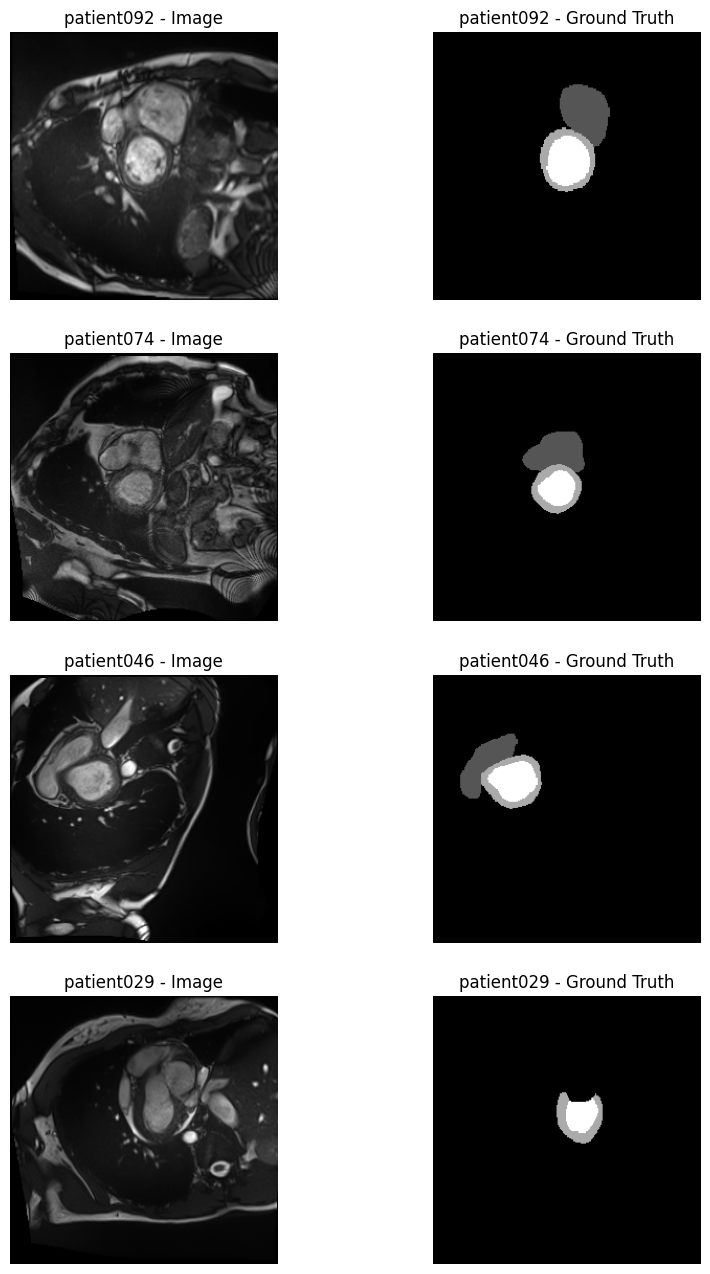

In [29]:
#Plotting random images, preprocessed ones.
def display_images_and_masks(images, masks, titles=None, slice_index=0):
    n = len(images)
    fig, axs = plt.subplots(n, 2, figsize=(10, 4 * n))
    for i in range(n):
        # Displaying the image
        axs[i, 0].imshow(images[i][:,:,slice_index], cmap='gray')
        axs[i, 0].axis('off')
        axs[i, 0].set_title(f"{titles[i]} - Image" if titles else "Image")

        # Displaying the ground truth mask
        axs[i, 1].imshow(masks[i][:,:,slice_index], cmap='gray')
        axs[i, 1].axis('off')
        axs[i, 1].set_title(f"{titles[i]} - Ground Truth" if titles else "Ground Truth")

    plt.show()

# Selecting a few samples to display
samples = [0, 1, 2, 3]  # Example indices of images to display

# Extracting the patient IDs for titles
patient_ids = [df.iloc[i]['Patient ID'] for i in samples]

images_to_display = [df.iloc[i]['Processed ED Image Path'] for i in samples]
masks_to_display = [df.iloc[i]['Processed ED GT Path'] for i in samples]

# Visualizing the images and masks
display_images_and_masks(images_to_display, masks_to_display, titles=patient_ids, slice_index=0)

In [39]:
from skimage.transform import resize

#Appending ES and ED images together, similarly graound truth masks.
def load_data(df):
    images = []
    masks = []
    for _, row in df.iterrows():
        ed_img = row['Processed ED Image Path']
        es_img = row['Processed ES Image Path']
        ed_gt = row['Processed ED GT Path']
        es_gt = row['Processed ES GT Path']

        images.append(ed_img)
        images.append(es_img)
        masks.append(ed_gt)
        masks.append(es_gt)

    # Converting lists to numpy arrays
    X = np.array(images)
    Y = np.array(masks)

    return X, Y

x, y = load_data(df)

In [40]:
from sklearn.model_selection import train_test_split
#Splitting the data for train and validation (80:20)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
print(len(x_train))
print(len(y_train))
print(len(x_val))
print(len(y_val))

160
160
40
40


In [42]:
import cv2
#Data augmentation
def augment_data(image, mask):
    augmented_samples = []

    # Flipping
    flip_image = cv2.flip(image, 1)
    flip_mask = cv2.flip(mask, 1)

    augmented_samples.append((flip_image, flip_mask))

    # Rotation for 3D images
    if len(image.shape) == 3:
        rotated_images = []
        rotated_masks = []
        for i in range(image.shape[2]):
            rotated_images.append(cv2.rotate(image[:, :, i], cv2.ROTATE_90_CLOCKWISE))
            rotated_masks.append(cv2.rotate(mask[:, :, i], cv2.ROTATE_90_CLOCKWISE))
        rotate_image_90 = np.stack(rotated_images, axis=2)
        rotate_mask_90 = np.stack(rotated_masks, axis=2)
    else:
        rotate_image_90 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        rotate_mask_90 = cv2.rotate(mask, cv2.ROTATE_90_CLOCKWISE)

    augmented_samples.append((rotate_image_90, rotate_mask_90))

    return augmented_samples


augmented_data = []
for img, mask in zip(x_train, y_train):
    augmented_samples = augment_data(img, mask)
    augmented_data.extend(augmented_samples)

x_augmented = np.array([img for img, _ in augmented_data])
y_augmented = np.array([mask for _, mask in augmented_data]) #Augmented data is appended along with train data

x_train_augmented = np.concatenate((x_train, x_augmented), axis=0)
y_train_augmented = np.concatenate((y_train, y_augmented), axis=0)

In [43]:
# Defining a simple Fully Convolutional Network model.
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout

def fcn_model(input_shape):
    inputs = Input(input_shape) #Input layer
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs) #First convolutional layer
    x = MaxPooling2D((2, 2))(x) #Maxpooling layer, reduction of spatial dimension
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x) #2nd convolutional layer
    x = UpSampling2D((2, 2))(x) #upsampling, back to original dimensions
    outputs = Conv2D(10, (1, 1), activation='sigmoid', padding='same')(x) #output layer

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = fcn_model(x_train.shape[1:])

In [44]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = fcn_model(x_train.shape[1:])

# Adjusting the learning rate here
learning_rate = 0.0001
optimizer = Adam(learning_rate=learning_rate)

# Compiling the model with the modified optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_train_augmented, y_train_augmented, validation_data=(x_val, y_val), epochs=100, batch_size=16)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.6936 - loss: 0.6877 - val_accuracy: 0.9313 - val_loss: 0.6512
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9457 - loss: 0.6323 - val_accuracy: 0.9606 - val_loss: 0.5841
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9642 - loss: 0.5588 - val_accuracy: 0.9589 - val_loss: 0.5206
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9444 - loss: 0.4878 - val_accuracy: 0.6596 - val_loss: 0.4944
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4535 - loss: 0.4598 - val_accuracy: 0.2463 - val_loss: 0.4835
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2348 - loss: 0.4424 - val_accuracy: 0.2238 - val_loss: 0.4737
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2393 - loss: 0.4357 - val_accuracy: 0.2690 - val_loss: 0.4631
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2759 - loss: 0.4248 - val_accuracy: 0.

In [45]:
import pickle

with open('training_history_final.pkl', 'wb') as file:
    pickle.dump(history.history, file)

In [46]:
model.save('fcn_cmr_final.keras')

In [47]:
with open('training_history_final.pkl', 'rb') as file:
    history = pickle.load(file)

In [48]:
from tensorflow.keras.models import load_model
fcn_model_cmr_final = load_model('fcn_cmr_final.keras')

In [49]:
loss, accuracy = fcn_model_cmr_final.evaluate(x_val, y_val)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.0782 - loss: 0.0971
Validation Loss: 0.10382237285375595
Validation Accuracy: 0.07613563537597656


In [50]:
a, b = load_data(df_test) #splitting of test data

In [51]:
predictions = fcn_model_cmr_final.predict(a) #model prediction

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


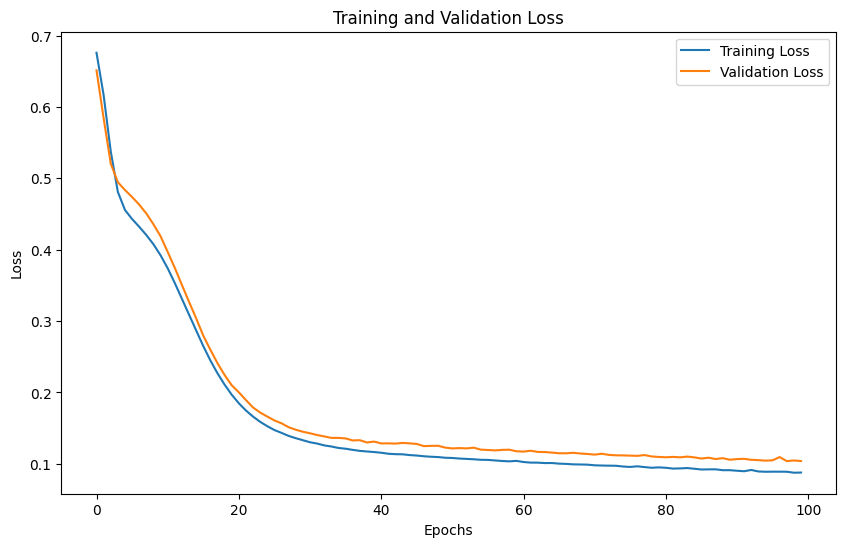

In [52]:
#Loss plot
plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


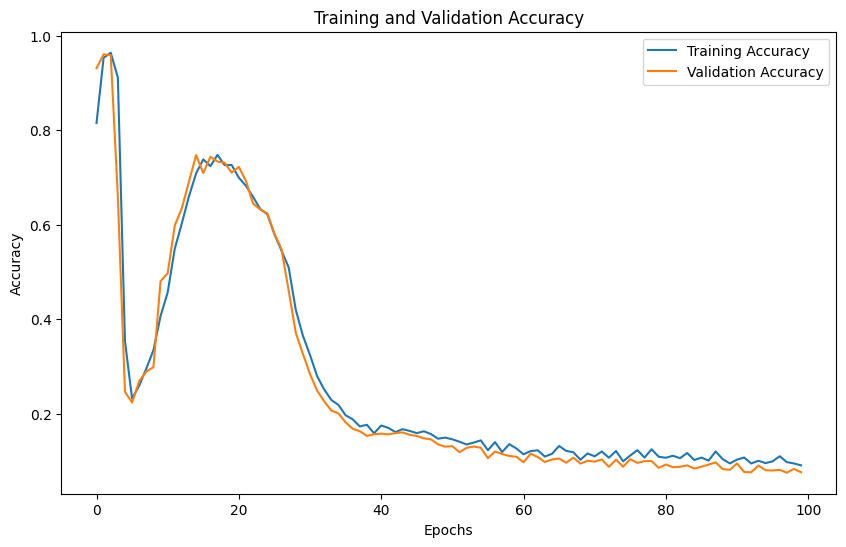

In [53]:
#Training and Validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import accuracy_score

predicted_classes = (predictions > 0.9).astype(int)
ground_truth_classes = b.astype(int)
accuracy = accuracy_score(ground_truth_classes.flatten(), predicted_classes.flatten())
print(f"Accuracy: {accuracy}")

Accuracy: 0.9581827392578125


In [54]:
def dice_score(y_true, y_pred):
    # Flatten the arrays to treat them as 1D vectors
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    intersection = np.sum(y_true_flat * y_pred_flat)
    return (2 * intersection) / (np.sum(y_true_flat) + np.sum(y_pred_flat))

# Calculate Dice score for each pair of ground truth and predicted masks
dice_scores = [dice_score(y_true, y_pred) for y_true, y_pred in zip(a, predictions)]
average_dice = np.mean(dice_scores)

print(f'Average Dice Score: {average_dice}')


Average Dice Score: 0.1820762335428396


In [55]:
def jaccard_index(y_true, y_pred):
    y_true_flat = y_true.flatten()
    y_pred_flat = y_pred.flatten()

    intersection = np.sum(y_true_flat * y_pred_flat)
    union = np.sum(y_true_flat) + np.sum(y_pred_flat) - intersection
    return intersection / union

# Calculate Jaccard index for each image
jaccard_scores = [jaccard_index(y_true, y_pred) for y_true, y_pred in zip(a, predictions)]
average_jaccard = np.mean(jaccard_scores)

print(f'Average Jaccard Index (IoU): {average_jaccard}')

Average Jaccard Index (IoU): 0.10265234161516074


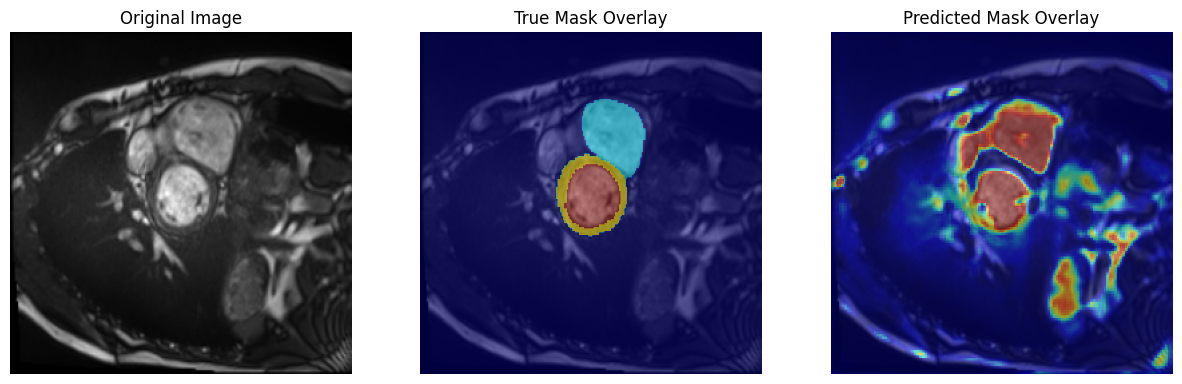

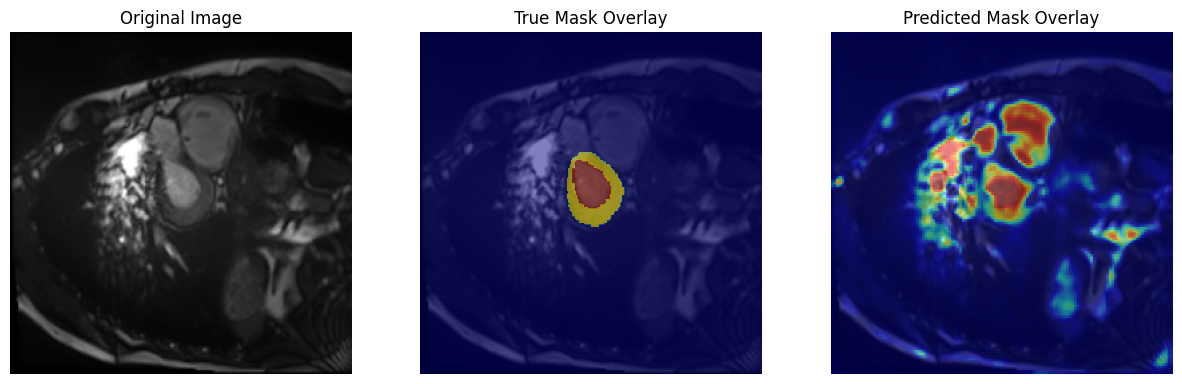

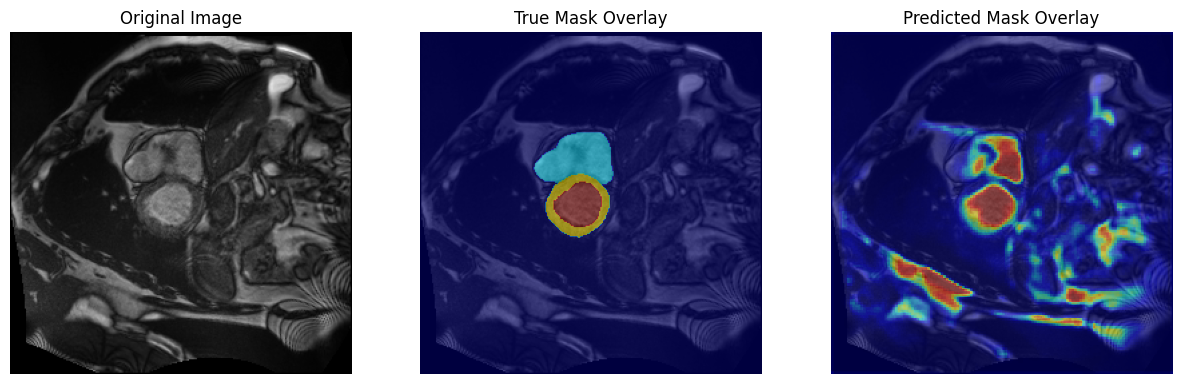

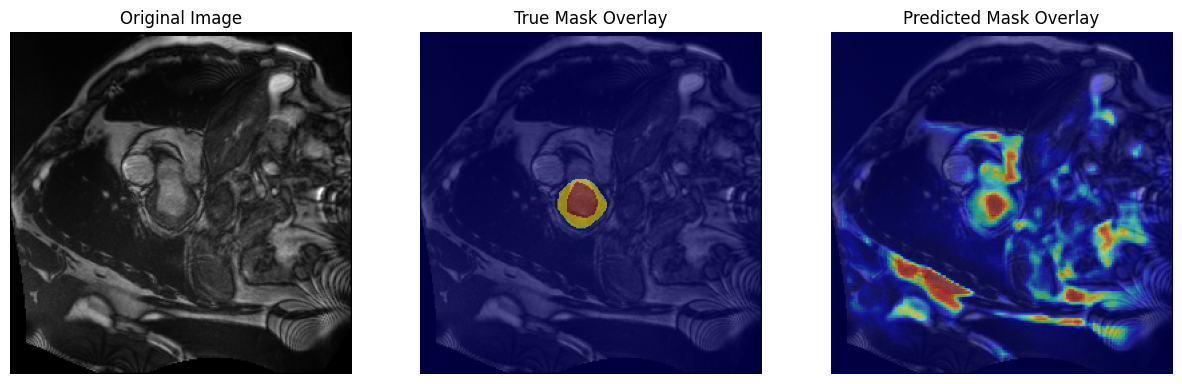

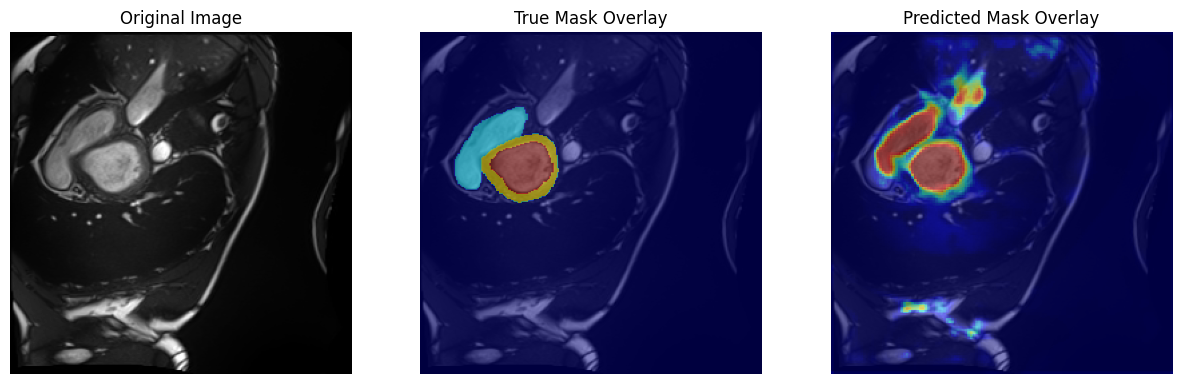

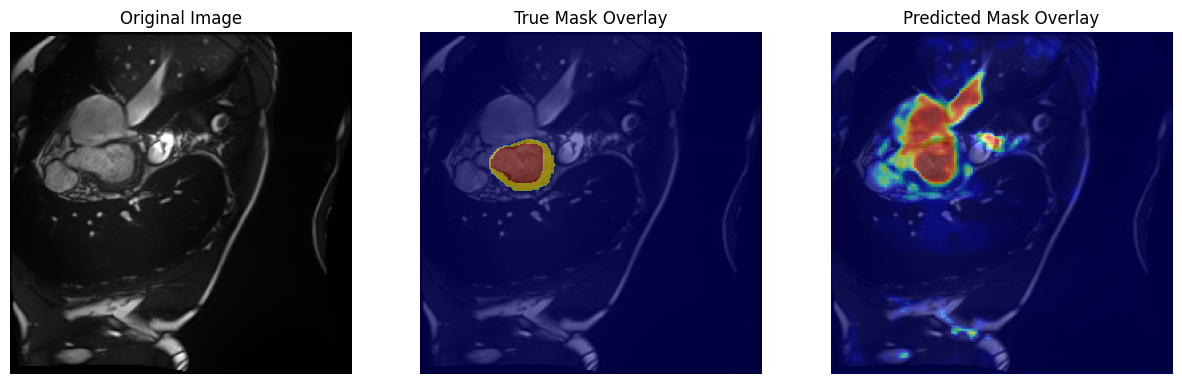

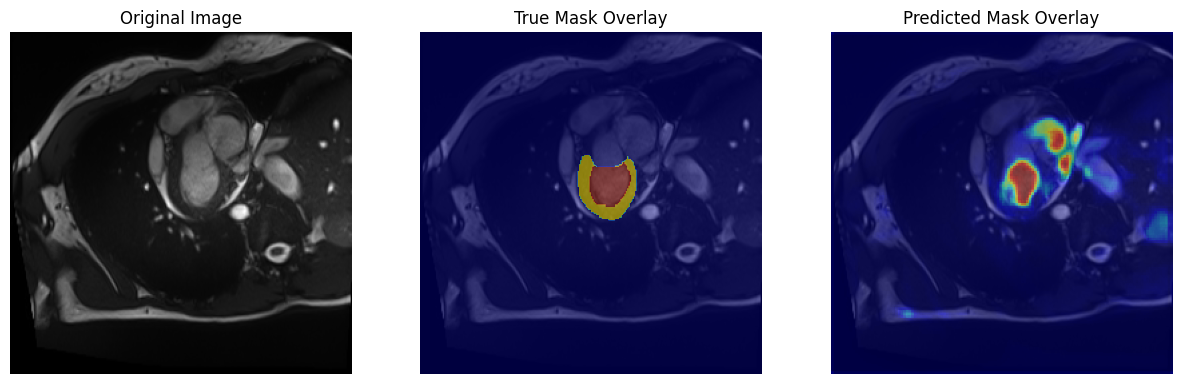

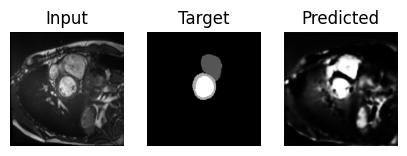

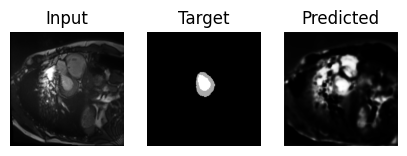

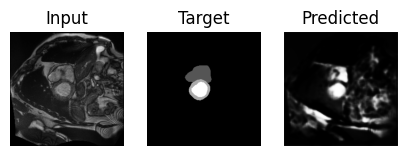

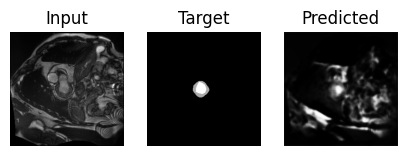

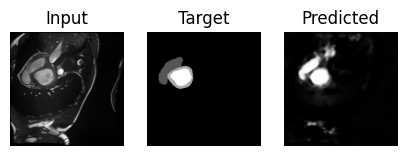

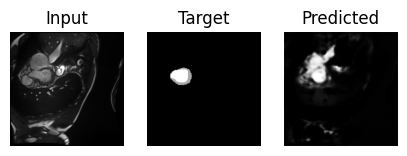

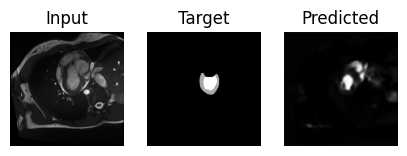

In [57]:
def display_overlayed_images(original, true_mask, predicted_mask, alpha=0.5):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    # Original image
    axs[0].imshow(original, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    # True mask
    axs[1].imshow(original, cmap='gray')
    axs[1].imshow(true_mask, cmap='jet', alpha=alpha)
    axs[1].set_title('True Mask Overlay')
    axs[1].axis('off')

    # Predicted mask
    axs[2].imshow(original, cmap='gray')
    axs[2].imshow(predicted_mask, cmap='jet', alpha=alpha)
    axs[2].set_title('Predicted Mask Overlay')
    axs[2].axis('off')

    plt.show()

# Example of displaying overlayed images
for i in range(min(len(a), 7)):  # Displaying first 5 examples
    original_image = a[i, :, :, 0]  # first slice in 3D image
    true_mask = b[i, :, :, 0]       # first slice in 3D ground truth
    predicted_mask = predictions[i, :, :, 0]  # first slice in 3D prediction

    display_overlayed_images(original_image, true_mask, predicted_mask)

def vis_output(item_input, actual_output, predicted_output, cmap='gray'):
    """
    Displaying three images in a row. The original input image, the expected output and the predicted output
    """
    fig = plt.figure(figsize=(5,5))
    plt.subplot(1, 3, 1)
    plt.imshow(item_input, cmap=cmap)
    plt.axis('off')
    plt.title('Input')
    plt.subplot(1, 3, 2)
    plt.imshow(actual_output, cmap=cmap)
    plt.axis('off')
    plt.title('Target')
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_output, cmap=cmap)
    plt.title('Predicted')
    plt.axis('off')
    plt.show()


#displaying overlayed images
for i in range(min(len(a), 7)):  # Display first 5 examples
    original_image = a[i, :, :, 0]  #  first slice in 3D image
    true_mask = b[i, :, :, 0]       # the first slice in 3D ground truth
    predicted_mask = predictions[i, :, :, 0]  # first slice in 3D prediction

    vis_output(original_image, true_mask, predicted_mask)


In [59]:
from scipy.spatial.distance import dice as dc
#Volume calculation for ACDC website
def calculate_metrics(pred_3Dmap, voxel_size, classes=[3, 1, 2]):
    metrics = []
    for c in classes:
        pred_c_i = np.copy(pred_3Dmap)
        pred_c_i[pred_c_i != c] = 0
        pred_c_i = np.clip(pred_c_i, 0, 1)
        print(f"Unique values in predicted mask for class {c}: {np.unique(pred_c_i)}")

        volpred = pred_c_i.sum() * np.prod(voxel_size)
        metrics.append({'Class': c, 'Volume Pred': volpred})
    return metrics


In [60]:
def make_prediction(fcn_model_cmr_final, image):
    image = np.array([image])  # Ensuring the image is a numpy array and adding a batch dimension
    prediction = fcn_model_cmr_final.predict(image)
    threshold=0.3
    binary_predictions = (prediction > threshold).astype(np.uint8)
    return binary_predictions

In [61]:
def process_patient(fcn_model_cmr_final, ed_image_path, es_image_path, info_path, target_shape=(256, 256), target_depth=10):

    # Step 1: Load and preprocess images and masks
    ed_img = preprocess_image(nb.load(ed_image_path).get_fdata(), target_shape, target_depth)
    es_img = preprocess_image(nb.load(es_image_path).get_fdata(), target_shape, target_depth)

    # Step 2: Make predictions
    pred_ed = make_prediction(fcn_model_cmr_final, ed_img)
    pred_es = make_prediction(fcn_model_cmr_final, es_img)

    # Step 3: Extract voxel size
    voxel_size = nb.load(ed_image_path).header.get_zooms()[:3]

    # Step 4: Calculate metrics
    ed_metrics = calculate_metrics(pred_ed, voxel_size)
    es_metrics = calculate_metrics(pred_es, voxel_size)

    return {
        'ed_metrics': ed_metrics,
        'es_metrics': es_metrics,
    }

In [62]:
results = process_patient(
    model,
    (filtered_df['ED Image Path'].values[0]),
    (filtered_df['ES Image Path'].values[0]),
    '/working/ACDC/ACDC/database/training/patient071/Info.cfg'
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Unique values in predicted mask for class 3: [0]
Unique values in predicted mask for class 1: [0 1]
Unique values in predicted mask for class 2: [0]
Unique values in predicted mask for class 3: [0]
Unique values in predicted mask for class 1: [0 1]
Unique values in predicted mask for class 2: [0]


print(results)

In [63]:
print(results)

{'ed_metrics': [{'Class': 3, 'Volume Pred': 0.0}, {'Class': 1, 'Volume Pred': 547798.6364135742}, {'Class': 2, 'Volume Pred': 0.0}], 'es_metrics': [{'Class': 3, 'Volume Pred': 0.0}, {'Class': 1, 'Volume Pred': 497664.53302001953}, {'Class': 2, 'Volume Pred': 0.0}]}


In [64]:
!pip install flask
from flask import Flask, request, jsonify
import threading

In [68]:
import tempfile

def save_uploaded_file(file):
    # Creating a temporary directory to save the file (files from ui)
    temp_dir = tempfile.mkdtemp()
    file_path = os.path.join(temp_dir, file.filename)

    # Saving the file to the temporary directory (for files from ui)
    file.save(file_path)

    return file_path, temp_dir

def clean_up(temp_file_path, temp_dir):
    """ Remove temporary files and directory. """
    os.remove(temp_file_path)
    os.rmdir(temp_dir)

In [69]:
import math
import nibabel as nb
from io import BytesIO

def calculate_bsa(height, weight):
    return math.sqrt((height * weight) / 3600)

def extract_info(info_path):
    info = {}
    with open(info_path, 'r') as f:
        lines = f.readlines()
    for line in lines:
        key, value = line.strip().split(':')
        info[key.strip()] = value.strip()
    height = float(info['Height'])
    weight = float(info['Weight'])
    bsa = calculate_bsa(height, weight)
    return bsa, round(bsa, 2) #bsa calculation for files from ui

In [74]:
#Flask app for creating API, for Node server to transfer CMR and info files from UI
app = Flask(__name__)

@app.route('/api/files', methods=['POST'])
def upload_files():
    if 'ed_nii_file' not in request.files or \
       'es_nii_file' not in request.files or \
       'cfg_file' not in request.files:
        return jsonify({"error": "Missing file(s)"}), 400

    ed_nii_file = request.files['ed_nii_file']
    es_nii_file = request.files['es_nii_file']
    cfg_file = request.files['cfg_file']


    # Saving the uploaded file to a temporary path
    es_nii_file_path, es_nii_temp_dir = save_uploaded_file(es_nii_file)
    ed_nii_file_path, ed_nii_temp_dir = save_uploaded_file(ed_nii_file)
    info_path, info_temp_dir = save_uploaded_file(cfg_file)

    try:
        # Processing the NIfTI file
        info_result = extract_info(info_path)

        result = process_patient(model, ed_nii_file_path, es_nii_file_path, info_path)

        # Cleaning up temporary files
        clean_up(ed_nii_file_path, ed_nii_temp_dir)
        clean_up(es_nii_file_path, es_nii_temp_dir)
        clean_up(info_path, info_temp_dir)

        return jsonify({
            "message": "File processed successfully",
            "bsa_result": info_result,
            "result": result
        })

    except Exception as e:
        # Attempting to clean up even if an error occurs
        clean_up(ed_nii_file_path, ed_nii_temp_dir)
        clean_up(es_nii_file_path, es_nii_temp_dir)
        clean_up(info_path, info_temp_dir)
        return jsonify({"error": "Internal Server Error", "message": str(e)}), 500

def run_flask():
    app.run(host='0.0.0.0', port=5001, threaded=True, use_reloader=False)  # Important to disable reloader

In [75]:
flask_thread = threading.Thread(target=run_flask)
flask_thread.start()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5001
 * Running on http://172.28.0.12:5001
INFO:werkzeug:Press CTRL+C to quit


In [71]:
!pip install pyngrok
from pyngrok import ngrok
ngrok.set_auth_token("2ktQRrsnSdANLmVt88vyj9qKTR2_snv1vLBAyuNjMZXSBQmK")

In [76]:
ngrok.kill()

In [77]:
# Terminate open tunnels if exist
ngrok.kill()

# Start an ngrok tunnel to the Flask app
public_url = ngrok.connect(5001)
print("Public URL:", public_url)

Public URL: NgrokTunnel: "https://a244-34-126-147-233.ngrok-free.app" -> "http://localhost:5001"
